In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Dell/Downloads/Highest Holywood Grossing Movies.csv")
df

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [3]:
#Adding columns
df['Year'] = 0
for i in range(len(df['Title'])):
    df['Year'][i] = df['Title'][i][-5:-1]
    
df['Movie_Title'] = 0
for i in range(len(df['Title'])):
    df['Movie_Title'][i] = df['Title'][i][: -6]    

C:\Users\Dell\AppData\Local\Temp/ipykernel_16340/2434017266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i] = df['Title'][i][-5:-1]
C:\Users\Dell\AppData\Local\Temp/ipykernel_16340/2434017266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Title'][i] = df['Title'][i][: -6]
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

In [4]:
#Dropping Columns
df.drop(['Unnamed: 0', 'Domestic Sales (in $)','International Sales (in $)','Release Date','Title'],axis=1 , inplace = True)

In [5]:
#Renaming columns
df =df.rename(columns={'World Sales (in $)' : 'Total Gross (in $)'})
df =df.rename(columns={'License' : 'Certificate'})


In [18]:
# Modifying Genre column

df['Genre'] = df['Genre'].apply(lambda x : x.split(',')[0])
df['Genre'] = df['Genre'].str.replace('\[','')
df['Genre'] = df['Genre'].str.replace('\]','')

df['Certificate'] = df['Certificate'].fillna('PG-13')


C:\Users\Dell\AppData\Local\Temp/ipykernel_16340/483911129.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Genre'] = df['Genre'].str.replace('\[','')
C:\Users\Dell\AppData\Local\Temp/ipykernel_16340/483911129.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Genre'] = df['Genre'].str.replace('\]','')


In [19]:
# Dropping duplictes
df.drop_duplicates(subset = ['Movie_Title'] , keep='last' , inplace = True)
df['Movie_Title'].value_counts()

Star Wars: Episode VII - The Force Awakens     1
Watchmen                                       1
Godzilla: King of the Monsters                 1
Valentine's Day                                1
The Grudge                                     1
                                              ..
Robin Hood: Prince of Thieves                  1
Knives Out                                     1
Kung Fu Panda 2                                1
Hannibal                                       1
Zookeeper                                      1
Name: Movie_Title, Length: 911, dtype: int64

In [20]:
g = df.groupby('Genre')

In [21]:
g.count()

,Movie Info,Distributor,Total Gross (in $),Movie Runtime,Certificate,Year,Movie_Title
Genre,,,,,,,
'Action',393,393,393,393,393,393,393
'Adventure',181,181,181,181,181,181,181
'Animation',6,6,6,6,6,6,6
'Biography',32,32,32,32,32,32,32
'Comedy',165,165,165,165,165,165,165
'Crime',33,33,33,33,33,33,33
'Documentary',1,1,1,1,1,1,1
'Drama',72,72,72,72,72,72,72
'Fantasy',3,3,3,3,3,3,3


In [22]:
g = df.groupby(['Genre'])['Total Gross (in $)'].mean()

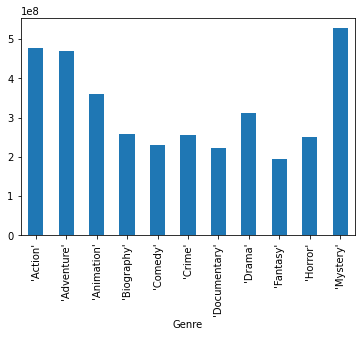

In [23]:
g.plot(kind='bar')
plt.show()

([<matplotlib.patches.Wedge at 0x1cb889ab070>,
 [Text(1.589303497080095, 1.5212213494981528, 'Warner Bros'),
  Text(-1.409574278125145, 1.6891122977611575, 'Walt Disney Studios Motion Pictures'),
  Text(-1.988061160562221, -0.9421320617960077, 'Universal Pictures'),
  Text(0.04279291202325015, -2.1995837712350426, 'Sony Pictures Entertainment (SPE)'),
  Text(1.9399114640469264, -1.0376625230099195, 'Twentieth Century Fox ')],
 [Text(0.8668928165891426, 0.8297570997262651, '24.3%'),
  Text(-0.7688586971591699, 0.9213339805969949, '23.5%'),
  Text(-1.0843969966703022, -0.5138902155250951, '18.4%'),
  Text(0.023341588376318258, -1.1997729661282048, '18.1%'),
  Text(1.0581335258437778, -0.5659977398235924, '15.6%')])

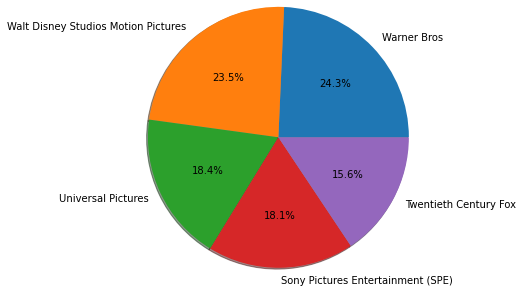

In [24]:
fig, ax = plt.subplots(figsize=(16, 3), subplot_kw=dict(aspect="equal"))

p = df['Distributor'].value_counts().head()
labels = 'Warner Bros','Walt Disney Studios Motion Pictures', 'Universal Pictures' ,'Sony Pictures Entertainment (SPE)', 'Twentieth Century Fox '

plt.axis=("equal")
plt.pie(p
       ,labels = labels
       ,shadow=True
       ,autopct='%1.1f%%'
       ,radius = 2)

<AxesSubplot:xlabel='count', ylabel='Genre'>

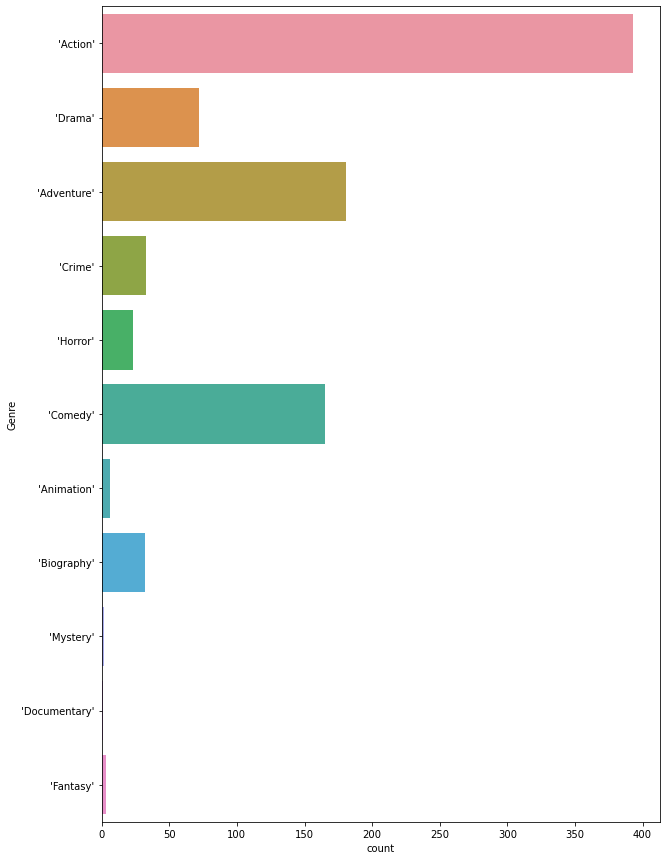

In [25]:
#Top genre which have more movie counts

plt.figure(figsize=(10,15))
sns.countplot(y="Genre", data = df)

In [26]:
df

,Movie Info,Distributor,Total Gross (in $),Genre,Movie Runtime,Certificate,Year,Movie_Title
0,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2069521700,'Action',2 hr 18 min,PG-13,2015,Star Wars: Episode VII - The Force Awakens
1,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2797501328,'Action',3 hr 1 min,PG-13,2019,Avengers: Endgame
2,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2847246203,'Action',2 hr 42 min,PG-13,2009,Avatar
3,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,1347597973,'Action',2 hr 14 min,PG-13,2018,Black Panther
4,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,2048359754,'Action',2 hr 29 min,PG-13,2018,Avengers: Infinity War
...,...,...,...,...,...,...,...,...
913,A poor yet passionate young man falls in love ...,New Line Cinema,117815157,'Drama',2 hr 3 min,PG-13,2004,The Notebook
914,An eight-year-old boy genius and his friends m...,Paramount Pictures,102992536,'Action',1 hr 22 min,PG-13,2001,Jimmy Neutron: Boy Genius
915,A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),204594016,'Biography',2 hr 13 min,PG-13,2010,Eat Pray Love
916,After picking up a traumatized young hitchhike...,New Line Cinema,107363905,'Crime',1 hr 38 min,R,2003,The Texas Chainsaw Massacre


In [15]:
p = df['Distributor'].value_counts().head()

In [16]:
p

Warner Bros.                           157
Walt Disney Studios Motion Pictures    152
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Name: Distributor, dtype: int64